In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
#read the rfm table calculated on the rfm analysis file
rfm = pd.read_csv('RFM.csv')

In [3]:
rfm

,Customer ID,Recency,Frequency,MonetaryValue
0,12346.0,326,34,77556.46
1,12347.0,3,222,4921.53
2,12348.0,76,51,2019.40
3,12349.0,19,175,4428.69
4,12350.0,311,17,334.40
...,...,...,...,...
5873,18283.0,4,938,2664.90
5874,18284.0,432,28,461.68
5875,18285.0,661,12,427.00
5876,18286.0,477,67,1296.43


<AxesSubplot:xlabel='MonetaryValue', ylabel='Count'>

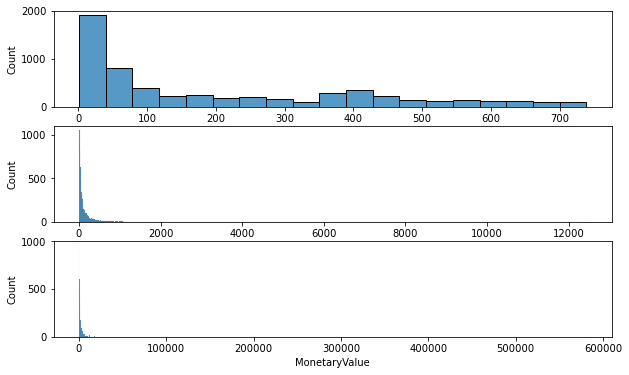

In [4]:
#observe distributions of recency, frequency and monetary values
plt.rcParams['figure.figsize'] = [10,6]
plt.subplot(3,1,1)
sns.histplot(rfm['Recency'],label='Recency')
plt.subplot(3,1,2)
sns.histplot(rfm['Frequency'],label='Frequency')
plt.subplot(3,1,3)
sns.histplot(rfm['MonetaryValue'],label='Monetary Value')

- Clearly the recency, frequency, monetary values are all right skewed. To adjust use log transformation on frequency, monetary value and use square root transformation(observed this gives distribution closer to normal distribution) on recency.

In [5]:
rfm['Recency'] = np.sqrt(rfm['Recency']).round(2)
rfm['Frequency'] = np.log(rfm['Frequency']).round(2)
rfm['MonetaryValue'] = np.log(rfm['MonetaryValue']).round(2)

<AxesSubplot:xlabel='MonetaryValue', ylabel='Count'>

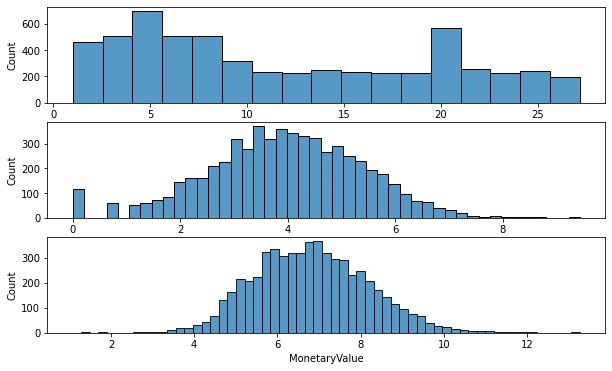

In [6]:
plt.rcParams['figure.figsize'] = [10,6]
plt.subplot(3,1,1)
sns.histplot(rfm['Recency'],label='Recency')
plt.subplot(3,1,2)
sns.histplot(rfm['Frequency'],label='Frequency')
plt.subplot(3,1,3)
sns.histplot(rfm['MonetaryValue'],label='Monetary Value')

<AxesSubplot:xlabel='MonetaryValue'>

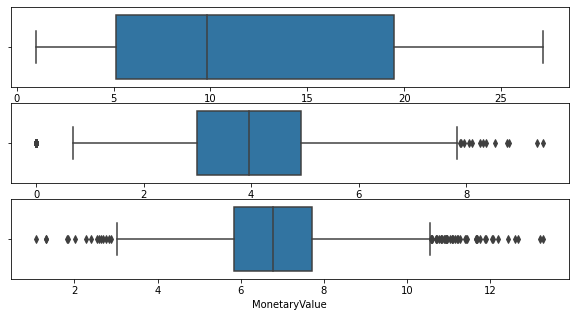

In [7]:
#check for outliers
plt.rcParams['figure.figsize'] = [10,5]
plt.subplot(3,1,1)
sns.boxplot(x='Recency',data=rfm)
plt.subplot(3,1,2)
sns.boxplot(x='Frequency',data=rfm)
plt.subplot(3,1,3)
sns.boxplot(x='MonetaryValue',data=rfm)

- Outliers are present in frequency and monetary values. Calculate the inter quantile range, find the upper and lower bounds, then cap and floor the outliers

In [8]:
def limit(x):
    Q1 = np.percentile(x,25)
    Q3 = np.percentile(x,75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    return(lower,upper)

In [9]:
freq_lower, freq_upper = limit(rfm['Frequency'])
money_lower, money_upper = limit(rfm['MonetaryValue'])

In [10]:
rfm['Frequency'] = np.where(rfm['Frequency'] <freq_lower, freq_lower,rfm['Frequency'])
rfm['Frequency'] = np.where(rfm['Frequency'] >freq_upper, freq_upper,rfm['Frequency'])
rfm['MonetaryValue'] = np.where(rfm['MonetaryValue'] <money_lower, money_lower,rfm['MonetaryValue'])
rfm['MonetaryValue'] = np.where(rfm['MonetaryValue'] >money_upper, money_upper,rfm['MonetaryValue'])

<AxesSubplot:xlabel='MonetaryValue'>

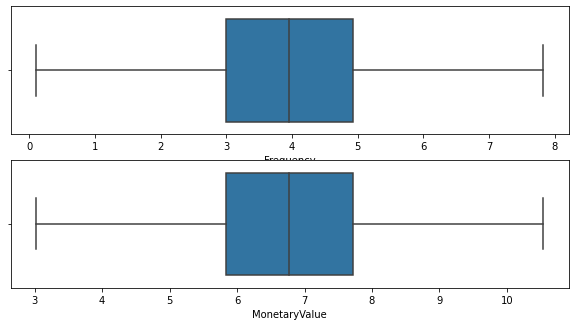

In [11]:
#look for outliers
plt.rcParams['figure.figsize'] = [10,8]
plt.subplot(3,1,2)
sns.boxplot(x='Frequency',data=rfm)
plt.subplot(3,1,3)
sns.boxplot(x='MonetaryValue',data=rfm)

In [12]:
#standardization
scale = StandardScaler()

In [13]:
rfm_final = scale.fit_transform(rfm[['Recency','Frequency','MonetaryValue']])
rfm_final = pd.DataFrame(rfm_final)
rfm_final = rfm_final.round(2)

In [14]:
rfm_final.insert(0,'ID',rfm['Customer ID'])
rfm_final.columns = rfm.columns

In [17]:
rfm_final.to_csv('Final_RFM.csv',index=False)